In [1]:
# Import all necessary dependencies to be used later in the code 
import matplotlib.pyplot as plt 
import pandas as pd
import scipy.stats as st
import numpy as np 
pd.set_option('display.max_rows', 10)

In [2]:
# select the path for the csv and read it in creating a dataframe
anime_path = "archive/anime.csv"

anime_df = pd.read_csv(anime_path)

anime_df


,anime_id,name,genre,type,episodes,rating,members
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572
4,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266
...,...,...,...,...,...,...,...
12289,9316,Toushindai My Lover: Minami tai Mecha-Minami,Hentai,OVA,1,4.15,211
12290,5543,Under World,Hentai,OVA,1,4.28,183
12291,5621,Violence Gekiga David no Hoshi,Hentai,OVA,4,4.88,219
12292,6133,Violence Gekiga Shin David no Hoshi: Inma Dens...,Hentai,OVA,1,4.98,175


In [3]:
#A second dataframe is made to work on 
anime_df2 = anime_df
# Genre column is renamed
anime_df2 = anime_df2.rename(columns={'genre': 'Genre'})

In [4]:
#display the second dataframe genre column only
print(anime_df2['Genre'])

0                     Drama, Romance, School, Supernatural
1        Action, Adventure, Drama, Fantasy, Magic, Mili...
2        Action, Comedy, Historical, Parody, Samurai, S...
3                                         Sci-Fi, Thriller
4        Action, Comedy, Historical, Parody, Samurai, S...
                               ...                        
12289                                               Hentai
12290                                               Hentai
12291                                               Hentai
12292                                               Hentai
12293                                               Hentai
Name: Genre, Length: 12294, dtype: object


In [5]:
#display the axes or columns in the original dataframe
anime_df.axes


[RangeIndex(start=0, stop=12294, step=1),
 Index(['anime_id', 'name', 'genre', 'type', 'episodes', 'rating', 'members'], dtype='object')]

In [6]:
#display genre column from original dataframe
anime_df['genre']

0                     Drama, Romance, School, Supernatural
1        Action, Adventure, Drama, Fantasy, Magic, Mili...
2        Action, Comedy, Historical, Parody, Samurai, S...
3                                         Sci-Fi, Thriller
4        Action, Comedy, Historical, Parody, Samurai, S...
                               ...                        
12289                                               Hentai
12290                                               Hentai
12291                                               Hentai
12292                                               Hentai
12293                                               Hentai
Name: genre, Length: 12294, dtype: object

In [7]:
#Attemp was made to drop Hentai genre using loc function
# anime_drop = anime_df[(anime_df[["genre"]] == 'Hentai')]
# anime2 = anime_df.drop(['genre'] == "Hentai", axis=0, inplace=False)
anime2 = anime_df.loc[anime_df['genre'] !="Hentai"]

In [8]:
anime2

,anime_id,name,genre,type,episodes,rating,members
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572
4,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266
...,...,...,...,...,...,...,...
12272,18197,Nudl Nude,"Comedy, Hentai, Parody",OVA,1,4.14,186
12273,18199,Nudl Nude 2,"Comedy, Hentai, Parody",OVA,1,4.00,146
12277,12397,Original Video Romance Animation,"Comedy, Hentai",OVA,2,4.66,176
12278,17833,Pink no Curtain,"Hentai, Slice of Life",OVA,1,3.61,138


In [9]:
#Getting rid of Yaoi tag from 
anime2 = anime2.loc[anime2['genre'] !="Yaoi"]
anime2

,anime_id,name,genre,type,episodes,rating,members
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572
4,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266
...,...,...,...,...,...,...,...
12272,18197,Nudl Nude,"Comedy, Hentai, Parody",OVA,1,4.14,186
12273,18199,Nudl Nude 2,"Comedy, Hentai, Parody",OVA,1,4.00,146
12277,12397,Original Video Romance Animation,"Comedy, Hentai",OVA,2,4.66,176
12278,17833,Pink no Curtain,"Hentai, Slice of Life",OVA,1,3.61,138


In [10]:
#Had to check using isinstance to third dataframe to see if genre is or contains a list

# anime3 = anime2.explode('genre').drop_duplicates()
# anime3
# from ast import literal_eval
# anime2['genre'] = anime2['genre'].apply(literal_eval)
# anime2['genre'].explode()
check_list = isinstance(anime2['genre'], list)

print(check_list)


False


In [11]:
#Previous attempt to explode genre column failed resulting in changing column value to string and then applying explode function
anime2['genre'].to_string()
# animelist = animelist['genre'].split()
anime2['genre'].str.split().explode()
# anime2


0              Drama,
0            Romance,
0             School,
0        Supernatural
1             Action,
             ...     
12278              of
12278            Life
12285         Demons,
12285         Hentai,
12285    Supernatural
Name: genre, Length: 38811, dtype: object

In [12]:
#This box was made to make sure the previous code was not a fluke and to create a new variable
anime3 = [anime2['genre'].to_string()]

anime3 = anime2['genre'].str.split().explode()

# anime3 = anime2.loc[anime2['genre'] !="Hentai"]
anime3

0              Drama,
0            Romance,
0             School,
0        Supernatural
1             Action,
             ...     
12278              of
12278            Life
12285         Demons,
12285         Hentai,
12285    Supernatural
Name: genre, Length: 38811, dtype: object

In [13]:
#anime3 which consist of the exploded genres is made into a new dataframe
anime3 = pd.DataFrame(anime3)
anime3

,genre
0,"Drama,"
0,"Romance,"
0,"School,"
0,Supernatural
1,"Action,"
...,...
12278,of
12278,Life
12285,"Demons,"
12285,"Hentai,"


In [14]:
# experimental merging anime2 and anime3 for later use 
merge2 = anime2.merge(anime3, how = 'right', on= "genre")
merge2

,anime_id,name,genre,type,episodes,rating,members
0,5365.0,Tsumiki no Ie,Drama,Movie,1,8.27,45189.0
1,6211.0,Tokyo Magnitude 8.0,Drama,TV,11,8.19,121349.0
2,29093.0,Grisaia no Meikyuu: Caprice no Mayu 0,Drama,Special,1,8.05,70039.0
3,1520.0,Black Jack,Drama,OVA,12,7.88,14414.0
4,2405.0,Hello! Lady Lynn,Drama,TV,36,7.85,1757.0
...,...,...,...,...,...,...,...
953515,NaN,NaN,Yuri,NaN,NaN,NaN,NaN
953516,NaN,NaN,Yuri,NaN,NaN,NaN,NaN
953517,NaN,NaN,Yuri,NaN,NaN,NaN,NaN
953518,NaN,NaN,Yuri,NaN,NaN,NaN,NaN


In [15]:
merge = anime2.merge(anime3, how = 'left', on= "genre")
merge

,anime_id,name,genre,type,episodes,rating,members
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572
4,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266
...,...,...,...,...,...,...,...
934013,18197,Nudl Nude,"Comedy, Hentai, Parody",OVA,1,4.14,186
934014,18199,Nudl Nude 2,"Comedy, Hentai, Parody",OVA,1,4.00,146
934015,12397,Original Video Romance Animation,"Comedy, Hentai",OVA,2,4.66,176
934016,17833,Pink no Curtain,"Hentai, Slice of Life",OVA,1,3.61,138


In [16]:
#counting occurences of anime titles to ensure they only appear once
np.count_nonzero(merge['name']=='Kimi no Na wa.')

1

In [17]:
# Starting from here the loc function is used repeatedly to remove the Hentai, Yuri, and Yaoi genre from the genre column
merge = merge.loc[merge['genre'] !=("Hentai")]
merge

,anime_id,name,genre,type,episodes,rating,members
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572
4,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266
...,...,...,...,...,...,...,...
934013,18197,Nudl Nude,"Comedy, Hentai, Parody",OVA,1,4.14,186
934014,18199,Nudl Nude 2,"Comedy, Hentai, Parody",OVA,1,4.00,146
934015,12397,Original Video Romance Animation,"Comedy, Hentai",OVA,2,4.66,176
934016,17833,Pink no Curtain,"Hentai, Slice of Life",OVA,1,3.61,138


In [18]:
merge = merge.loc[merge['genre'] !=("Yuri")]
merge

,anime_id,name,genre,type,episodes,rating,members
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572
4,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266
...,...,...,...,...,...,...,...
934013,18197,Nudl Nude,"Comedy, Hentai, Parody",OVA,1,4.14,186
934014,18199,Nudl Nude 2,"Comedy, Hentai, Parody",OVA,1,4.00,146
934015,12397,Original Video Romance Animation,"Comedy, Hentai",OVA,2,4.66,176
934016,17833,Pink no Curtain,"Hentai, Slice of Life",OVA,1,3.61,138


In [19]:
merge = merge.loc[merge['genre'] !=("Hentai,")]
merge

,anime_id,name,genre,type,episodes,rating,members
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572
4,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266
...,...,...,...,...,...,...,...
934013,18197,Nudl Nude,"Comedy, Hentai, Parody",OVA,1,4.14,186
934014,18199,Nudl Nude 2,"Comedy, Hentai, Parody",OVA,1,4.00,146
934015,12397,Original Video Romance Animation,"Comedy, Hentai",OVA,2,4.66,176
934016,17833,Pink no Curtain,"Hentai, Slice of Life",OVA,1,3.61,138


In [20]:
merge = merge.loc[merge['genre'] !=("Yaoi")]
merge

,anime_id,name,genre,type,episodes,rating,members
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572
4,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266
...,...,...,...,...,...,...,...
934013,18197,Nudl Nude,"Comedy, Hentai, Parody",OVA,1,4.14,186
934014,18199,Nudl Nude 2,"Comedy, Hentai, Parody",OVA,1,4.00,146
934015,12397,Original Video Romance Animation,"Comedy, Hentai",OVA,2,4.66,176
934016,17833,Pink no Curtain,"Hentai, Slice of Life",OVA,1,3.61,138


In [21]:
merge = merge.loc[merge['genre'] !=("Yuri,")]
merge

,anime_id,name,genre,type,episodes,rating,members
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572
4,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266
...,...,...,...,...,...,...,...
934013,18197,Nudl Nude,"Comedy, Hentai, Parody",OVA,1,4.14,186
934014,18199,Nudl Nude 2,"Comedy, Hentai, Parody",OVA,1,4.00,146
934015,12397,Original Video Romance Animation,"Comedy, Hentai",OVA,2,4.66,176
934016,17833,Pink no Curtain,"Hentai, Slice of Life",OVA,1,3.61,138


In [22]:
merge = merge.loc[merge['genre'] !=("Yaoi,")]
merge

,anime_id,name,genre,type,episodes,rating,members
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572
4,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266
...,...,...,...,...,...,...,...
934013,18197,Nudl Nude,"Comedy, Hentai, Parody",OVA,1,4.14,186
934014,18199,Nudl Nude 2,"Comedy, Hentai, Parody",OVA,1,4.00,146
934015,12397,Original Video Romance Animation,"Comedy, Hentai",OVA,2,4.66,176
934016,17833,Pink no Curtain,"Hentai, Slice of Life",OVA,1,3.61,138


In [23]:
#dropping nan value
merge2= merge.dropna()
merge2

,anime_id,name,genre,type,episodes,rating,members
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572
4,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266
...,...,...,...,...,...,...,...
934012,23677,Manga Edo Erobanashi,"Comedy, Hentai, Historical",OVA,5,2.86,111
934013,18197,Nudl Nude,"Comedy, Hentai, Parody",OVA,1,4.14,186
934014,18199,Nudl Nude 2,"Comedy, Hentai, Parody",OVA,1,4.00,146
934015,12397,Original Video Romance Animation,"Comedy, Hentai",OVA,2,4.66,176


In [24]:
np.count_nonzero(merge2['name']=='Tokyo Magnitude 8.0')

155

In [25]:
#dropping duplicates in dataframe
merge3 = merge2.drop_duplicates()
merge3

,anime_id,name,genre,type,episodes,rating,members
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572
4,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266
...,...,...,...,...,...,...,...
934012,23677,Manga Edo Erobanashi,"Comedy, Hentai, Historical",OVA,5,2.86,111
934013,18197,Nudl Nude,"Comedy, Hentai, Parody",OVA,1,4.14,186
934014,18199,Nudl Nude 2,"Comedy, Hentai, Parody",OVA,1,4.00,146
934015,12397,Original Video Romance Animation,"Comedy, Hentai",OVA,2,4.66,176


In [26]:
np.count_nonzero(merge3['name']=='Tokyo Magnitude 8.0')

1

In [27]:
#This is a previous attempt to merge dataframes together while aggregating genres that were previously exploded back into their listed form but failed
# cleananime = (merge3.groupby(['anime_id','name',"type", 'episodes', 'rating', 'members'])
#       .agg({'genre': lambda x: x.tolist()})
#       .reset_index())

In [28]:
# cleananime

In [29]:
#Sorrting view by highest rated anime
# cleananime2 = cleananime.sort_values(by='rating',ascending=False)
# cleananime2
cleananime2 = anime2.sort_values(by='rating',ascending=False)
cleananime2

,anime_id,name,genre,type,episodes,rating,members
10464,33662,Taka no Tsume 8: Yoshida-kun no X-Files,"Comedy, Parody",Movie,1,10.00,13
10400,30120,Spoon-hime no Swing Kitchen,"Adventure, Kids",TV,Unknown,9.60,47
9595,23005,Mogura no Motoro,Slice of Life,Movie,1,9.50,62
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630
9078,33607,Kahei no Umi,Historical,Movie,1,9.33,44
...,...,...,...,...,...,...,...
11111,34445,Yuuki Yuuna wa Yuusha de Aru: Yuusha no Shou,"Drama, Fantasy, Magic, Slice of Life",TV,6,NaN,4439
11112,33035,Yuyushiki Special,NaN,Special,1,NaN,2294
11113,33390,Zunda Horizon,NaN,Movie,1,NaN,160
12252,34382,Citrus,"Drama, Romance, School, Yuri",NaN,Unknown,NaN,2459


In [30]:
#Filling in all nan value with 0
cleananime2 = cleananime2.fillna(0)
cleananime2

,anime_id,name,genre,type,episodes,rating,members
10464,33662,Taka no Tsume 8: Yoshida-kun no X-Files,"Comedy, Parody",Movie,1,10.00,13
10400,30120,Spoon-hime no Swing Kitchen,"Adventure, Kids",TV,Unknown,9.60,47
9595,23005,Mogura no Motoro,Slice of Life,Movie,1,9.50,62
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630
9078,33607,Kahei no Umi,Historical,Movie,1,9.33,44
...,...,...,...,...,...,...,...
11111,34445,Yuuki Yuuna wa Yuusha de Aru: Yuusha no Shou,"Drama, Fantasy, Magic, Slice of Life",TV,6,0.00,4439
11112,33035,Yuyushiki Special,0,Special,1,0.00,2294
11113,33390,Zunda Horizon,0,Movie,1,0.00,160
12252,34382,Citrus,"Drama, Romance, School, Yuri",0,Unknown,0.00,2459


In [31]:
#using code that looks through string in genre column for removing hentai, Yaoi, and Yuri 
cleananime3 = cleananime2[cleananime2['genre'].str.contains("Hentai", na=False)==False]
cleananime3.sort_values(by='rating',ascending=False)

,anime_id,name,genre,type,episodes,rating,members
10464,33662,Taka no Tsume 8: Yoshida-kun no X-Files,"Comedy, Parody",Movie,1,10.00,13
10400,30120,Spoon-hime no Swing Kitchen,"Adventure, Kids",TV,Unknown,9.60,47
9595,23005,Mogura no Motoro,Slice of Life,Movie,1,9.50,62
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630
9078,33607,Kahei no Umi,Historical,Movie,1,9.33,44
...,...,...,...,...,...,...,...
10970,32271,Dies Irae,"Action, Magic, Super Power",TV,Unknown,0.00,5363
10971,34299,Digimon Adventure tri. 4: Soushitsu,"Action, Adventure, Comedy, Drama",Movie,1,0.00,6529
10972,33672,Doraemon Movie 37: Nobita no Nankyoku Kachikoc...,"Adventure, Comedy, Fantasy, Kids, Shounen",Movie,1,0.00,172
10973,31678,Dragon Nest: Throne of Elves,"Action, Adventure, Fantasy, Magic",Movie,1,0.00,1466


In [32]:
cleananime4 = cleananime3[cleananime3['genre'].str.contains("Yuri", na=False)==False]
cleananime4.sort_values(by='rating',ascending=False)

,anime_id,name,genre,type,episodes,rating,members
10464,33662,Taka no Tsume 8: Yoshida-kun no X-Files,"Comedy, Parody",Movie,1,10.00,13
10400,30120,Spoon-hime no Swing Kitchen,"Adventure, Kids",TV,Unknown,9.60,47
9595,23005,Mogura no Motoro,Slice of Life,Movie,1,9.50,62
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630
9078,33607,Kahei no Umi,Historical,Movie,1,9.33,44
...,...,...,...,...,...,...,...
10970,32271,Dies Irae,"Action, Magic, Super Power",TV,Unknown,0.00,5363
10971,34299,Digimon Adventure tri. 4: Soushitsu,"Action, Adventure, Comedy, Drama",Movie,1,0.00,6529
10972,33672,Doraemon Movie 37: Nobita no Nankyoku Kachikoc...,"Adventure, Comedy, Fantasy, Kids, Shounen",Movie,1,0.00,172
10973,31678,Dragon Nest: Throne of Elves,"Action, Adventure, Fantasy, Magic",Movie,1,0.00,1466


In [33]:
cleananime5 = cleananime4[cleananime4['genre'].str.contains("Yaoi", na=False)==False]
cleananime5.sort_values(by='rating',ascending=False)

,anime_id,name,genre,type,episodes,rating,members
10464,33662,Taka no Tsume 8: Yoshida-kun no X-Files,"Comedy, Parody",Movie,1,10.00,13
10400,30120,Spoon-hime no Swing Kitchen,"Adventure, Kids",TV,Unknown,9.60,47
9595,23005,Mogura no Motoro,Slice of Life,Movie,1,9.50,62
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630
9078,33607,Kahei no Umi,Historical,Movie,1,9.33,44
...,...,...,...,...,...,...,...
10970,32271,Dies Irae,"Action, Magic, Super Power",TV,Unknown,0.00,5363
10971,34299,Digimon Adventure tri. 4: Soushitsu,"Action, Adventure, Comedy, Drama",Movie,1,0.00,6529
10972,33672,Doraemon Movie 37: Nobita no Nankyoku Kachikoc...,"Adventure, Comedy, Fantasy, Kids, Shounen",Movie,1,0.00,172
10973,31678,Dragon Nest: Throne of Elves,"Action, Adventure, Fantasy, Magic",Movie,1,0.00,1466


In [34]:
cleananime5['genre'].value_counts

<bound method IndexOpsMixin.value_counts of 10464                          Comedy, Parody
10400                         Adventure, Kids
9595                            Slice of Life
0        Drama, Romance, School, Supernatural
9078                               Historical
                         ...                 
11109              Comedy, Kids, Supernatural
11110    Drama, Fantasy, Magic, Slice of Life
11111    Drama, Fantasy, Magic, Slice of Life
11112                                       0
11113                                       0
Name: genre, Length: 11114, dtype: object>

In [43]:
cleananime5['genre'] = pd.to_numeric(cleananime5['genre'], errors='coerce')
print(cleananime5.dtypes)

anime_id      int64
name         object
genre       float64
type         object
episodes     object
rating      float64
members       int64
dtype: object


C:\Users\dinhc\anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [44]:
cleananime5['name'] = pd.to_numeric(cleananime5['name'], errors='coerce')
print(cleananime5.dtypes)

anime_id      int64
name        float64
genre       float64
type         object
episodes     object
rating      float64
members       int64
dtype: object


C:\Users\dinhc\anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [46]:
cleananime5['type'] = pd.to_numeric(cleananime5['type'], errors='coerce')
print(cleananime5.dtypes)

anime_id      int64
name        float64
genre       float64
type        float64
episodes     object
rating      float64
members       int64
dtype: object


C:\Users\dinhc\anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


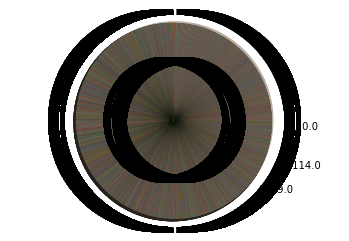

In [58]:
labels = cleananime5['name']
sizes = cleananime5['anime_id']
# explode = ['genre']

fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%',shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()